<a href="https://colab.research.google.com/github/abhijeet8825/Webscraping/blob/main/Numerical_Programming_in_Python_Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Web Scraping & Data Handling Challenge**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Start The Project**

## **Task 1:- Web Scrapping**

In [1]:
#Installing all necessary labraries
!pip install bs4
!pip install requests

In [2]:
#import all necessary labraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np

## **Scrapping Movies Data**

In [3]:
# Specifying the URL from which movies related data will be fetched
url='https://www.justwatch.com/in/movies?release_year_from=2000'
headers = {
'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
'Accept-Language': 'en-US,en;q=0.9',
'Accept-Encoding': 'gzip, deflate, br',
'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
}

# Sending an HTTP GET request to the URL
page=requests.get(url,headers = headers)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(page.text,'html.parser')
# Printing the prettified HTML content
print(soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Movie URL's**

In [4]:
# Write Your Code here

Movie_url  =[]
movies_link = soup.find_all("a",class_="title-list-grid__item--link")
for link in movies_link:
    movie_url = "https://www.justwatch.com"+link["href"]
    Movie_url.append(movie_url)

In [5]:
Movie_url

['https://www.justwatch.com/in/movie/aavesham-2024',
 'https://www.justwatch.com/in/movie/munjha',
 'https://www.justwatch.com/in/movie/godzilla-minus-one',
 'https://www.justwatch.com/in/movie/hit-man',
 'https://www.justwatch.com/in/movie/project-k',
 'https://www.justwatch.com/in/movie/family-star',
 'https://www.justwatch.com/in/movie/the-gangster-the-cop-the-devil',
 'https://www.justwatch.com/in/movie/the-fall-guy',
 'https://www.justwatch.com/in/movie/manjummel-boys',
 'https://www.justwatch.com/in/movie/godzilla-x-kong-the-new-empire',
 'https://www.justwatch.com/in/movie/laapataa-ladies',
 'https://www.justwatch.com/in/movie/inside-out',
 'https://www.justwatch.com/in/movie/maidaan',
 'https://www.justwatch.com/in/movie/bade-miyan-chote-miyan-2023',
 'https://www.justwatch.com/in/movie/the-crew-2024',
 'https://www.justwatch.com/in/movie/rockstar',
 'https://www.justwatch.com/in/movie/dune-part-two',
 'https://www.justwatch.com/in/movie/furiosa',
 'https://www.justwatch.com/in

## **Scrapping Movie Title**

In [6]:
# Write Your Code here

Movie_Title =[]

for url in Movie_url:
  try:
      response = requests.get(url,headers = headers)
      soup = BeautifulSoup(response.text,'html.parser')
      title = soup.find_all('div',attrs={'class':'title-detail-hero__details'})[0].find_all('h1')[0].text
  except:
      title = "NA"
  Movie_Title.append(title)



In [7]:
Movie_Title

[' Aavesham (2024)',
 ' Munjya (2024)',
 ' Godzilla Minus One (2023)',
 ' Hit Man (2024)',
 ' Kalki 2898 AD (2024)',
 ' Family Star (2024)',
 ' The Gangster, the Cop, the Devil (2019)',
 ' The Fall Guy (2024)',
 ' Manjummel Boys (2024)',
 ' Godzilla x Kong: The New Empire (2024)',
 ' Laapataa Ladies (2024)',
 ' Inside Out (2015)',
 ' Maidaan (2024)',
 ' Bade Miyan Chote Miyan (2024)',
 ' Crew (2024)',
 ' Rockstar (2011)',
 ' Dune: Part Two (2024)',
 ' Furiosa: A Mad Max Saga (2024)',
 ' Aranmanai 4 (2024)',
 ' Premalu (2024)',
 ' Mad Max: Fury Road (2015)',
 ' Hereditary (2018)',
 ' Oppenheimer (2023)',
 ' Kung Fu Panda 4 (2024)',
 ' Madgaon Express (2024)',
 ' Challengers (2024)',
 ' Civil War (2024)',
 ' Varshangalkku Shesham (2024)',
 ' 365 Days (2020)',
 ' Do Aur Do Pyaar (2024)',
 ' Maharshi (2019)',
 ' Maharaja (2024)',
 ' 12th Fail (2023)',
 ' Exhuma (2024)',
 ' Animal (2023)',
 ' Gangs of Godavari (2024)',
 ' Salaar (2023)',
 ' Hanu-Man (2024)',
 ' Shaitaan (2024)',
 ' Under Pa

## **Scrapping release Year**

In [8]:
# Write Your Code here
Release_year =[]
for url in Movie_url:
  try:
      response = requests.get(url,headers=headers)
      soup = BeautifulSoup(response.text,"html.parser")
      year = soup.find("div",class_="title-detail-hero__details").span.text.strip("( )")
  except:
    year = 'NA'
  Release_year.append(year)



In [9]:
Release_year

['2024',
 '2024',
 '2023',
 '2024',
 '2024',
 '2024',
 '2019',
 '2024',
 '2024',
 '2024',
 '2024',
 '2015',
 '2024',
 '2024',
 '2024',
 '2011',
 '2024',
 '2024',
 '2024',
 '2024',
 '2015',
 '2018',
 '2023',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2020',
 '2024',
 '2019',
 '2024',
 '2023',
 '2024',
 '2023',
 '2024',
 '2023',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 'NA',
 'NA',
 '2023',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 '2024',
 '2024',
 '2001',
 'NA',
 '2023',
 '2024',
 'NA',
 '2018',
 '2024',
 '2023',
 '2024',
 'NA',
 '2011',
 '2024',
 'NA',
 'NA',
 'NA',
 '2018',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 '2024',
 'NA',
 '2013',
 '2024',
 'NA',
 'NA',
 'NA',
 '2024',
 '2015',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 '2023',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 '2017']

## **Scrapping Genres**

In [10]:
# Write Your Code here
Genre =[]
for url in Movie_url:
  try:
      response = requests.get(url,headers = headers)
      soup = BeautifulSoup(response.text,"html.parser")
      Genre_indi = soup.find('h3', class_='detail-infos__subheading', string='Genres').find_next_sibling('div', class_='detail-infos__value').text.strip()

  except:
      Genre_indi = 'NA'
  Genre.append(Genre_indi)


In [11]:
Genre

['Comedy, Action & Adventure',
 'Comedy, Horror',
 'Horror, Drama, Science-Fiction, Action & Adventure',
 'Comedy, Romance, Crime',
 'Drama, Action & Adventure, Fantasy, Science-Fiction, Mystery & Thriller',
 'Drama, Action & Adventure, Romance, Comedy',
 'Mystery & Thriller, Action & Adventure, Crime',
 'Action & Adventure, Comedy, Drama',
 'Drama, Mystery & Thriller',
 'Fantasy, Science-Fiction, Mystery & Thriller, Action & Adventure',
 'Comedy, Drama',
 'Animation, Kids & Family, Action & Adventure, Drama, Comedy, Fantasy',
 'Drama, History, Sport',
 'Action & Adventure, Science-Fiction, Mystery & Thriller',
 'Comedy, Drama',
 'Drama, Music & Musical, Romance',
 'Action & Adventure, Science-Fiction, Drama',
 'Science-Fiction, Mystery & Thriller, Action & Adventure',
 'Horror, Comedy',
 'Romance, Comedy',
 'Action & Adventure, Science-Fiction, Mystery & Thriller',
 'Horror, Mystery & Thriller, Drama',
 'Drama, History',
 'Action & Adventure, Comedy, Kids & Family, Fantasy, Animation'

## **Scrapping IMBD Rating**

In [12]:
# Write Your Code here
Imdb_Rating =[]
for url in Movie_url:
  response = requests.get(url,headers=headers)
  soup = BeautifulSoup(response.text,"html.parser")

  try:
    Imdb = soup.find_all("div",class_="jw-scoring-listing__rating")[1].span
    Imdb1= Imdb.text[1:4]
  except Exception as e:
    # print(err)
    Imdb1 = "NA"
  Imdb_Rating.append(Imdb1)


In [13]:
Imdb_Rating

['8.0',
 '7.2',
 '7.7',
 '6.9',
 '8.0',
 '5.2',
 '6.9',
 '7.0',
 '8.3',
 '6.2',
 '8.5',
 '8.1',
 '8.1',
 '4.1',
 '5.9',
 '7.7',
 '8.6',
 '7.7',
 '5.3',
 '7.9',
 '8.1',
 '7.3',
 '8.3',
 '6.3',
 '7.1',
 '7.3',
 '7.2',
 '6.7',
 '3.3',
 '6.4',
 'NA',
 '8.6',
 'NA',
 '6.9',
 '6.2',
 '5.1',
 '6.5',
 '7.9',
 '6.6',
 '5.2',
 '6.4',
 'NA',
 'NA',
 'NA',
 '6.1',
 '8.0',
 '8.2',
 '6.5',
 '6.1',
 'NA',
 'NA',
 '7.2',
 '7.6',
 '6.9',
 '6.3',
 '7.7',
 '7.6',
 '8.2',
 '5.7',
 '7.7',
 '6.7',
 '8.7',
 '7.0',
 'NA',
 'NA',
 'NA',
 'NA',
 '7.5',
 '8.4',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 '6.4',
 'NA',
 'NA',
 'NA',
 'NA',
 '8.2',
 '6.5',
 'NA',
 'NA',
 '8.1',
 'NA',
 'NA',
 'NA',
 '6.2',
 '5.6',
 'NA',
 '7.0',
 'NA',
 'NA',
 '4.8',
 'NA',
 'NA',
 'NA',
 'NA',
 '6.9',
 '8.0']

## **Scrapping Runtime/Duration**

In [14]:
# Write Your Code here

Runtime =[]
for url in Movie_url:
  response = requests.get(url,headers = headers)
  soup = BeautifulSoup(response.text,"html.parser")
  try:
    Runtime_indi = soup.find('h3', class_='detail-infos__subheading', string='Runtime').find_next_sibling('div', class_='detail-infos__value').text.strip()
  except:
    Runtime_indi ='NA'
  Runtime.append(Runtime_indi)


In [15]:
Runtime

['2h 38min',
 '2h 3min',
 '2h 5min',
 '1h 56min',
 '3h 1min',
 '2h 39min',
 '1h 50min',
 '2h 6min',
 '2h 15min',
 '1h 55min',
 '2h 2min',
 '1h 35min',
 '3h 1min',
 '2h 44min',
 '1h 58min',
 '2h 39min',
 '2h 47min',
 '2h 28min',
 '2h 28min',
 '2h 36min',
 '2h 1min',
 '2h 6min',
 '3h 0min',
 '1h 34min',
 '2h 23min',
 '2h 12min',
 '1h 49min',
 '2h 46min',
 '1h 54min',
 '2h 20min',
 '2h 56min',
 '2h 30min',
 '2h 26min',
 '2h 14min',
 '3h 21min',
 '2h 23min',
 '2h 55min',
 '2h 39min',
 '2h 12min',
 '1h 44min',
 '2h 11min',
 '2h 12min',
 '1h 37min',
 '2h 52min',
 '1h 44min',
 '2h 35min',
 '2h 28min',
 '2h 0min',
 '1h 55min',
 '1h 49min',
 '2h 16min',
 '2h 25min',
 '2h 32min',
 '2h 8min',
 '2h 9min',
 '2h 56min',
 '2h 59min',
 '1h 53min',
 '2h 10min',
 '2h 30min',
 '2h 12min',
 '2h 46min',
 '1h 46min',
 '2h 1min',
 '2h 36min',
 '2h 8min',
 '1h 48min',
 '1h 31min',
 '2h 22min',
 '2h 26min',
 '2h 10min',
 '2h 12min',
 '2h 0min',
 '1h 59min',
 '2h 19min',
 '1h 46min',
 '2h 4min',
 '2h 38min',
 '

## **Scrapping Age Rating**

In [18]:
# Write Your Code here
Age_Rating=[]
for url in Movie_url:
  response = requests.get(url,headers = headers)
  soup = BeautifulSoup(response.text,"html.parser")
  try:
    rating1 = soup.find('h3', class_='detail-infos__subheading', string='Age rating').find_next_sibling('div', class_='detail-infos__value').text.strip()
  except:
    rating1 = "NA"
  Age_Rating.append(rating1)

In [19]:
Age_Rating

['NA',
 'NA',
 'NA',
 'A',
 'UA',
 'NA',
 'NA',
 'UA',
 'UA',
 'UA',
 'UA',
 'U',
 'NA',
 'UA',
 'UA',
 'UA',
 'NA',
 'A',
 'NA',
 'U',
 'A',
 'A',
 'UA',
 'U',
 'UA',
 'A',
 'NA',
 'NA',
 'NA',
 'UA',
 'UA',
 'NA',
 'NA',
 'UA',
 'A',
 'UA',
 'A',
 'UA',
 'UA',
 'NA',
 'NA',
 'NA',
 'U',
 'UA',
 'A',
 'UA',
 'UA',
 'A',
 'NA',
 'NA',
 'UA',
 'NA',
 'U',
 'UA',
 'A',
 'NA',
 'UA',
 'A',
 'UA',
 'UA',
 'NA',
 'UA',
 'A',
 'NA',
 'UA',
 'NA',
 'A',
 'A',
 'UA',
 'UA',
 'U',
 'UA',
 'NA',
 'NA',
 'NA',
 'A',
 'NA',
 'NA',
 'UA',
 'A',
 'NA',
 'A',
 'UA',
 'U',
 'NA',
 'A',
 'NA',
 'A',
 'UA',
 'NA',
 'NA',
 'NA',
 'UA',
 'NA',
 'NA',
 'UA',
 'NA',
 'NA',
 'NA',
 'NA']

## **Fetching Production Countries Details**

In [20]:
# Write Your Code here
Country_origin =[]
for url in Movie_url:
  response = requests.get(url,headers = headers)
  soup = BeautifulSoup(response.text,"html.parser")
  try:
    country1=soup.find('h3', class_='detail-infos__subheading', string=' Production country ').find_next_sibling('div', class_='detail-infos__value').text.strip()
  except:
    country1 = 'NA'
  Country_origin.append(country1)

In [21]:
Country_origin

['India',
 'India',
 'Japan',
 'United States',
 'India',
 'India',
 'South Korea',
 'United States, Australia, Canada',
 'India',
 'United States, Australia',
 'India',
 'United States',
 'India',
 'India',
 'India',
 'India',
 'United States',
 'Australia, United States',
 'India',
 'India',
 'Australia, United States',
 'United States',
 'United States, United Kingdom',
 'United States',
 'India',
 'Italy, United States',
 'United States, United Kingdom',
 'India',
 'Poland',
 'India',
 'India',
 'India',
 'India',
 'South Korea',
 'India',
 'India',
 'India',
 'India',
 'India',
 'France',
 'India',
 'India',
 'United States',
 'United States, India',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'India',
 'United States',
 'United Kingdom, United States',
 'India',
 'Philippines',
 'India',
 'India',
 'Sweden, India',
 'India',
 'India',
 'India',
 'India',
 'United States',
 'Canada, Singapore, United States',
 'India

## **Fetching Streaming Service Details**

In [24]:
# Write Your Code here
Streaming_Provider =[]
for url in Movie_url:
  response = requests.get(url,headers = headers)
  try:
    soup = BeautifulSoup(response.text,"html.parser")
    Stream_provider = soup.find("div",class_='picture-wrapper').find_all("img",class_='offer__icon')
    alt_values = [img['alt'] for img in Stream_provider]
    alt_values = ",".join(alt_values)

  except AttributeError as err:
    alt_values = 'NA'
  Streaming_Provider.append(alt_values)



In [25]:
Streaming_Provider

['Amazon Prime Video',
 'NA',
 'Netflix',
 'Netflix',
 'Apple TV+',
 'Amazon Prime Video',
 'Lionsgate Play',
 'Apple TV',
 'Hotstar',
 'Apple TV',
 'Netflix',
 'Apple TV',
 'Amazon Prime Video',
 'Netflix',
 'Netflix',
 'NA',
 'Apple TV',
 'Apple TV',
 'Hotstar',
 'Hotstar',
 'Amazon Prime Video',
 'Amazon Prime Video',
 'Apple TV',
 'Apple TV',
 'Amazon Prime Video',
 'Apple TV',
 'Amazon Prime Video',
 'Sony Liv',
 'Netflix',
 'Hotstar',
 'Amazon Prime Video',
 'Apple TV+',
 'Hotstar',
 'Apple TV+',
 'Netflix',
 'Netflix',
 'Hotstar',
 'Jio Cinema',
 'Netflix',
 'Netflix',
 'Netflix',
 'Apple TV+',
 'Crunchyroll',
 'Apple TV+',
 'Apple TV',
 'Apple TV',
 'Apple TV',
 'Apple TV',
 'Apple TV',
 'Apple TV',
 'Amazon Prime Video',
 'Apple TV+',
 'Apple TV',
 'Amazon Prime Video',
 'Netflix',
 'Zee5',
 'Amazon Prime Video',
 'NA',
 'Amazon Prime Video',
 'Zee5',
 'Hotstar',
 'Amazon Prime Video',
 'Apple TV',
 'NA',
 'Hotstar',
 'Amazon Prime Video',
 'Amazon Prime Video',
 'Amazon Prime

## **Now Creating Movies DataFrame**

In [26]:
# Write Your Code here
dict1 ={"Title":Movie_Title,"Release Year":Release_year,"Genre":Genre,"Imdb Rating":Imdb_Rating,"Runtime":Runtime,
        "Age Rating":Age_Rating,"Country origin":Country_origin,
        "Url":Movie_url,"Streaming Provider":Streaming_Provider,"Type" : 'Movie'}
Movies_df = pd.DataFrame(dict1)



In [27]:
Movies_df

,Title,Release Year,Genre,Imdb Rating,Runtime,Age Rating,Country origin,Url,Streaming Provider,Type
0,Aavesham (2024),2024,"Comedy, Action & Adventure",8.0,2h 38min,NA,India,https://www.justwatch.com/in/movie/aavesham-2024,Amazon Prime Video,Movie
1,Munjya (2024),2024,"Comedy, Horror",7.2,2h 3min,NA,India,https://www.justwatch.com/in/movie/munjha,NA,Movie
2,Godzilla Minus One (2023),2023,"Horror, Drama, Science-Fiction, Action & Adven...",7.7,2h 5min,NA,Japan,https://www.justwatch.com/in/movie/godzilla-mi...,Netflix,Movie
3,Hit Man (2024),2024,"Comedy, Romance, Crime",6.9,1h 56min,A,United States,https://www.justwatch.com/in/movie/hit-man,Netflix,Movie
4,Kalki 2898 AD (2024),2024,"Drama, Action & Adventure, Fantasy, Science-Fi...",8.0,3h 1min,UA,India,https://www.justwatch.com/in/movie/project-k,Apple TV+,Movie
...,...,...,...,...,...,...,...,...,...,...
95,NA,NA,NA,NA,NA,UA,NA,https://www.justwatch.com/in/movie/garudan-2024,Amazon Prime Video,Movie
96,NA,NA,NA,NA,2h 19min,NA,NA,https://www.justwatch.com/in/movie/laila-majnu,Zee5,Movie
97,NA,NA,NA,NA,2h 4min,NA,"Japan, Germany",https://www.justwatch.com/in/movie/perfect-days,MUBI,Movie
98,NA,NA,"Comedy, Drama",6.9,NA,NA,United States,https://www.justwatch.com/in/movie/jerry-and-m...,NA,Movie


In [33]:
Movies_df['Imdb Rating'] = Movies_df['Imdb Rating'].replace("NA",float("NaN"))


## **Scraping TV  Show Data**

In [36]:
# Specifying the URL from which tv show related data will be fetched
tv_url='https://www.justwatch.com/in/tv-shows?release_year_from=2000'

headers = {
'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
'Accept-Language': 'en-US,en;q=0.9',
'Accept-Encoding': 'gzip, deflate, br',
'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
}
# Sending an HTTP GET request to the URL
page=requests.get(tv_url,headers = headers)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(page.text,'html.parser')
# Printing the prettified HTML content
print(soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Tv shows Url details**

In [37]:
# Write Your Code here
Tv_shows_url  =[]
Tv_shows_link = soup.find_all("a",class_="title-list-grid__item--link")
for link in Tv_shows_link:
    tv_shows_url = "https://www.justwatch.com"+link["href"]
    Tv_shows_url.append(tv_shows_url)

In [38]:
Tv_shows_url

['https://www.justwatch.com/in/tv-show/panchayat',
 'https://www.justwatch.com/in/tv-show/house-of-the-dragon',
 'https://www.justwatch.com/in/tv-show/mirzapur',
 'https://www.justwatch.com/in/tv-show/the-boys',
 'https://www.justwatch.com/in/tv-show/gullak',
 'https://www.justwatch.com/in/tv-show/kota-factory',
 'https://www.justwatch.com/in/tv-show/bridgerton',
 'https://www.justwatch.com/in/tv-show/game-of-thrones',
 'https://www.justwatch.com/in/tv-show/raising-voices',
 'https://www.justwatch.com/in/tv-show/demon-slayer-kimetsu-no-yaiba',
 'https://www.justwatch.com/in/tv-show/shogun-2024',
 'https://www.justwatch.com/in/tv-show/heeramandi',
 'https://www.justwatch.com/in/tv-show/the-bear',
 'https://www.justwatch.com/in/tv-show/apharan',
 'https://www.justwatch.com/in/tv-show/dark-matter-2024',
 'https://www.justwatch.com/in/tv-show/the-good-doctor',
 'https://www.justwatch.com/in/tv-show/aashram',
 'https://www.justwatch.com/in/tv-show/sunflower-2021',
 'https://www.justwatch.co

## **Fetching Tv Show Title details**

In [48]:
# Write Your Code here

# Write Your Code here
Tv_shows_Title =[]

for url in Tv_shows_url:
  try:
      response = requests.get(url,headers = headers)
      soup = BeautifulSoup(response.text,"html.parser")
      title = soup.find("div",class_="title-block").h1.text
  except:
      title = 'NA'
  Tv_shows_Title.append(title)


In [49]:
Tv_shows_Title

[' Panchayat ',
 ' House of the Dragon ',
 ' Mirzapur ',
 ' The Boys ',
 ' Gullak ',
 ' Kota Factory ',
 ' Bridgerton ',
 ' Game of Thrones ',
 ' Raising Voices ',
 ' Demon Slayer: Kimetsu no Yaiba ',
 ' Shōgun ',
 ' Heeramandi: The Diamond Bazaar ',
 ' The Bear ',
 ' Apharan ',
 ' Dark Matter ',
 ' The Good Doctor ',
 ' Aashram ',
 ' Sunflower ',
 ' The Acolyte ',
 ' Fallout ',
 ' Attack on Titan ',
 ' 3 Body Problem ',
 ' Presumed Innocent ',
 ' Fargo ',
 ' Farzi ',
 ' Maxton Hall: The World Between Us ',
 ' From ',
 ' Supacell ',
 ' Jamnapaar ',
 ' Bigg Boss OTT ',
 ' Stranger Things ',
 ' Breaking Bad ',
 ' Money Heist ',
 ' Asur: Welcome to Your Dark Side ',
 ' Mastram ',
 ' The Legend of Hanuman ',
 ' The Family Man ',
 ' Peaky Blinders ',
 ' Tulsa King ',
 ' Murder in Mahim ',
 ' MTV Splitsvilla ',
 ' The Orville ',
 " Joko Anwar's Nightmares and Daydreams ",
 ' My Demon ',
 ' Resident Alien ',
 ' Eric ',
 ' True Detective ',
 ' Jujutsu Kaisen ',
 ' Mayfair Witches ',
 ' Dehati 

## **Fetching Release Year**

In [51]:
# Write Your Code here
Release_year_ =[]
for url in Tv_shows_url:
  try:
      response = requests.get(url,headers = headers)
      soup = BeautifulSoup(response.text,"html.parser")
      year = soup.find("div",class_="title-block").span.text.strip("( )")
  except:
    year = 'NA'
  Release_year_.append(year)

In [52]:
Release_year_

['2020',
 '2022',
 '2018',
 '2019',
 '2019',
 '2019',
 '2020',
 '2011',
 '2024',
 '2019',
 '2024',
 '2024',
 '2022',
 '2018',
 '2024',
 '2017',
 '2020',
 '2021',
 '2024',
 '2024',
 '2013',
 '2024',
 '2024',
 '2014',
 '2023',
 '2024',
 '2022',
 '2024',
 '2024',
 '2021',
 '2016',
 '2008',
 '2017',
 '2020',
 '2020',
 '2021',
 '2019',
 '2013',
 '2022',
 '2024',
 '2008',
 '2017',
 '2024',
 'NA',
 'NA',
 'NA',
 '2014',
 '2020',
 '2023',
 '2023',
 '2024',
 '2018',
 '2024',
 '2017',
 '2021',
 '2022',
 'NA',
 '2006',
 'NA',
 'NA',
 '2002',
 '2018',
 '2018',
 '2009',
 'NA',
 'NA',
 'NA',
 'NA',
 '2021',
 'NA',
 'NA',
 '2007',
 '2015',
 '2023',
 'NA',
 'NA',
 'NA',
 'NA',
 '2020',
 'NA',
 'NA',
 'NA',
 'NA',
 '2020',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 '2024',
 'NA',
 '2011',
 'NA',
 'NA',
 '2020',
 '2005',
 '2024',
 'NA',
 'NA',
 'NA']

## **Fetching TV Show Genre Details**

In [53]:
# Write Your Code here
Genre_ =[]
for url in Movie_url:
  response = requests.get(url,headers=headers)
  soup = BeautifulSoup(response.text,"html.parser")
  try:
    Genre_indi1 = soup.find('h3', class_='detail-infos__subheading', string='Genres').find_next_sibling('div', class_='detail-infos__value').text.strip()
  except:
    Genre_indi1 ='NA'

  Genre_.append(Genre_indi1)


In [54]:
Genre_

['Comedy, Action & Adventure',
 'Comedy, Horror',
 'Horror, Drama, Science-Fiction, Action & Adventure',
 'Comedy, Romance, Crime',
 'Action & Adventure, Fantasy, Science-Fiction, Drama, Mystery & Thriller',
 'Drama, Action & Adventure, Romance, Comedy',
 'Mystery & Thriller, Action & Adventure, Crime',
 'Action & Adventure, Comedy, Drama',
 'Drama, Mystery & Thriller',
 'Fantasy, Science-Fiction, Mystery & Thriller, Action & Adventure',
 'Comedy, Drama',
 'Animation, Kids & Family, Action & Adventure, Drama, Comedy, Fantasy',
 'Drama, History, Sport',
 'Action & Adventure, Science-Fiction, Mystery & Thriller',
 'Comedy, Drama',
 'Drama, Music & Musical, Romance',
 'Science-Fiction, Action & Adventure, Drama',
 'Science-Fiction, Mystery & Thriller, Action & Adventure',
 'Horror, Comedy',
 'Romance, Comedy',
 'Action & Adventure, Science-Fiction, Mystery & Thriller',
 'Horror, Mystery & Thriller, Drama',
 'Drama, History',
 'Comedy, Kids & Family, Fantasy, Animation, Action & Adventure'

## **Fetching IMDB Rating Details**

In [57]:
# Write Your Code here
Imdb_Rating_ =[]
for url in Tv_shows_url:
  response = requests.get(url,headers = headers)
  soup = BeautifulSoup(response.text,"html.parser")

  try:
    Imdb = soup.find_all("div",class_="jw-scoring-listing__rating")[1].span
    Imdb1= Imdb.text[1:4]
  except Exception as e:
    # print(err)
    Imdb1 = "NA"
  Imdb_Rating_.append(Imdb1)

In [58]:
Imdb_Rating_

['9.0',
 '8.4',
 '8.5',
 '8.7',
 '9.1',
 '9.0',
 '7.4',
 '9.2',
 '7.2',
 '8.6',
 '8.7',
 '6.4',
 '8.6',
 '8.2',
 '7.8',
 '8.0',
 '7.4',
 '7.4',
 '3.4',
 '8.4',
 '9.1',
 '7.5',
 '7.6',
 '8.9',
 '8.4',
 '7.6',
 'NA',
 '6.6',
 '8.3',
 '1.9',
 '8.7',
 '9.5',
 '8.2',
 '8.5',
 '6.9',
 '9.1',
 '8.7',
 '8.8',
 '8.0',
 '8.1',
 '3.8',
 '8.0',
 '6.6',
 '7.7',
 '8.1',
 '6.9',
 '8.9',
 '8.6',
 '6.2',
 '7.2',
 '6.7',
 '8.0',
 '8.4',
 '8.7',
 '7.7',
 '8.1',
 '8.3',
 '3.7',
 '7.7',
 '8.1',
 '8.4',
 '6.4',
 '4.8',
 '8.5',
 '3.4',
 '8.7',
 '8.4',
 '7.0',
 '7.6',
 '8.3',
 '8.7',
 '8.7',
 '9.1',
 'NA',
 '8.5',
 '7.6',
 '7.3',
 '8.3',
 '3.7',
 '9.3',
 '7.8',
 '6.5',
 '7.6',
 'NA',
 '7.1',
 '8.2',
 'NA',
 '8.7',
 '7.7',
 '8.2',
 '7.3',
 '8.5',
 '6.1',
 '8.1',
 '8.1',
 '8.3',
 '8.3',
 '8.1',
 '7.9',
 '9.0']

## **Fetching Age Rating Details**

In [59]:
# Write Your Code here
Age_Rating_=[]
for url in Movie_url:
  response = requests.get(url,headers = headers)
  soup = BeautifulSoup(response.text,"html.parser")
  try:
    rating1 = soup.find('h3', class_='detail-infos__subheading', string='Age rating').find_next_sibling('div', class_='detail-infos__value').text.strip()
  except:
    rating1 ='NA'
  Age_Rating_.append(rating1)


In [60]:
Age_Rating_

['NA',
 'NA',
 'NA',
 'A',
 'UA',
 'NA',
 'NA',
 'UA',
 'UA',
 'UA',
 'UA',
 'U',
 'NA',
 'UA',
 'UA',
 'UA',
 'NA',
 'A',
 'NA',
 'U',
 'A',
 'A',
 'UA',
 'U',
 'UA',
 'A',
 'NA',
 'NA',
 'NA',
 'UA',
 'UA',
 'NA',
 'NA',
 'UA',
 'A',
 'UA',
 'A',
 'UA',
 'UA',
 'NA',
 'NA',
 'NA',
 'U',
 'UA',
 'NA',
 'NA',
 'UA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'UA',
 'A',
 'UA',
 'UA',
 'NA',
 'UA',
 'NA',
 'NA',
 'UA',
 'NA',
 'NA',
 'NA',
 'UA',
 'NA',
 'U',
 'NA',
 'NA',
 'NA',
 'NA',
 'A',
 'NA',
 'NA',
 'NA',
 'A',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'UA',
 'NA',
 'NA',
 'A']

## **Fetching Production Country details**

In [61]:
# Write Your Code here
Country_origin_ =[]
for url in Movie_url:
  response = requests.get(url,headers = headers)
  soup = BeautifulSoup(response.text,"html.parser")
  try:
    country1 = soup.find('h3', class_='detail-infos__subheading', string=' Production country ').find_next_sibling('div', class_='detail-infos__value').text.strip()
  except:
    country1 ='NA'
  Country_origin_.append(country1)

In [62]:
Country_origin_

['India',
 'India',
 'Japan',
 'United States',
 'India',
 'India',
 'South Korea',
 'Australia, Canada, United States',
 'India',
 'Australia, United States',
 'India',
 'United States',
 'India',
 'India',
 'India',
 'India',
 'United States',
 'Australia, United States',
 'India',
 'India',
 'Australia, United States',
 'United States',
 'United States, United Kingdom',
 'United States',
 'India',
 'United States, Italy',
 'United States, United Kingdom',
 'India',
 'Poland',
 'India',
 'India',
 'India',
 'India',
 'South Korea',
 'India',
 'India',
 'India',
 'India',
 'India',
 'France',
 'India',
 'India',
 'United States',
 'United States, India',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'India',
 'United States',
 'United Kingdom, United States',
 'India',
 'Philippines',
 'India',
 'India',
 'India, Sweden',
 'India',
 'India',
 'India',
 'India',
 'United States',
 'Canada, Singapore, United States',
 'India

## **Fetching Streaming Service details**

In [65]:
# Write Your Code here
Streaming_Provider_ =[]
for url in Tv_shows_url:
  response = requests.get(url,headers = headers)
  try:
    soup = BeautifulSoup(response.text,"html.parser")
    Stream_provider = soup.find("div",class_='buybox-row stream').find_all("img",class_='offer__icon')
    alt_values1 = [img['alt'] for img in Stream_provider]
    alt_values1 = ",".join(alt_values1)

  except AttributeError as err:
    alt_values1 = "NA"
  Streaming_Provider_.append(alt_values1)

In [66]:
Streaming_Provider_

['Amazon Prime Video',
 'Jio Cinema',
 'Amazon Prime Video',
 'Amazon Prime Video',
 'NA',
 'Netflix',
 'Netflix',
 'Jio Cinema',
 'Netflix',
 'Netflix,Crunchyroll,Crunchyroll Amazon Channel',
 'Hotstar',
 'Netflix',
 'Hotstar',
 'Jio Cinema,Alt Balaji',
 'Apple TV+',
 'Amazon Prime Video,Netflix,Sony Liv',
 'MX Player',
 'Zee5,VI movies and tv',
 'Hotstar',
 'Amazon Prime Video',
 'Amazon Prime Video,Anime Times Amazon Channel',
 'Netflix',
 'Apple TV+',
 'Amazon Prime Video',
 'Amazon Prime Video',
 'Amazon Prime Video',
 'NA',
 'Netflix',
 'Amazon miniTV',
 'Jio Cinema',
 'NA',
 'Netflix',
 'Netflix',
 'Jio Cinema',
 'NA',
 'Hotstar',
 'Amazon Prime Video',
 'Netflix',
 'Jio Cinema',
 'Jio Cinema',
 'Jio Cinema',
 'Hotstar',
 'Netflix',
 'Netflix',
 'Jio Cinema,Netflix',
 'NA',
 'NA',
 'Netflix,Crunchyroll,Crunchyroll Amazon Channel',
 'Amazon Prime Video',
 'Amazon miniTV',
 'Netflix',
 'NA',
 'Crunchyroll,Crunchyroll Amazon Channel',
 'NA',
 'NA',
 'Amazon Prime Video',
 'NA',
 'N

## **Fetching Duration Details**

In [67]:
# Write Your Code here
Runtime_ =[]
for url in Movie_url:
  response = requests.get(url,headers=headers)
  soup = BeautifulSoup(response.text,"html.parser")
  try:
    Runtime_indi1 = soup.find('h3', class_='detail-infos__subheading', string='Runtime').find_next_sibling('div', class_='detail-infos__value').text.strip()
  except:
    Runtime_indi1 ='NA'

  Runtime_.append(Runtime_indi1)

In [68]:
Runtime_

['2h 38min',
 '2h 3min',
 '2h 5min',
 '1h 56min',
 '3h 1min',
 '2h 39min',
 '1h 50min',
 '2h 6min',
 '2h 15min',
 '1h 55min',
 '2h 2min',
 '1h 35min',
 '3h 1min',
 '2h 44min',
 '1h 58min',
 '2h 39min',
 '2h 47min',
 '2h 28min',
 '2h 28min',
 '2h 36min',
 '2h 1min',
 '2h 6min',
 '3h 0min',
 '1h 34min',
 '2h 23min',
 '2h 12min',
 '1h 49min',
 '2h 46min',
 '1h 54min',
 '2h 20min',
 '2h 56min',
 '2h 30min',
 '2h 26min',
 '2h 14min',
 '3h 21min',
 '2h 23min',
 '2h 55min',
 '2h 39min',
 '2h 12min',
 '1h 44min',
 '2h 11min',
 '2h 12min',
 '1h 37min',
 '2h 52min',
 '1h 44min',
 '2h 35min',
 '2h 28min',
 '2h 0min',
 '1h 55min',
 'NA',
 'NA',
 '2h 25min',
 '2h 32min',
 '2h 8min',
 'NA',
 '2h 56min',
 '2h 59min',
 'NA',
 '2h 10min',
 'NA',
 '2h 12min',
 'NA',
 'NA',
 'NA',
 'NA',
 '2h 8min',
 '1h 48min',
 'NA',
 '2h 22min',
 'NA',
 '2h 10min',
 'NA',
 'NA',
 'NA',
 '2h 19min',
 '1h 46min',
 'NA',
 '2h 38min',
 '2h 8min',
 '3h 0min',
 'NA',
 'NA',
 '2h 19min',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 '

## **Creating TV Show DataFrame**

In [69]:
# Write Your Code here
dict2 ={"Title":Tv_shows_Title,"Release Year":Release_year_,"Genre":Genre_,"Imdb Rating":Imdb_Rating_,
        "Runtime":Runtime_,"Age Rating":Age_Rating_,"Country origin":Country_origin_,
        "Url":Tv_shows_url,"Streaming Provider":Streaming_Provider_,'Type':'Tv Show'}

Tv_Shows_df = pd.DataFrame(dict2)

In [70]:
Tv_Shows_df

,Title,Release Year,Genre,Imdb Rating,Runtime,Age Rating,Country origin,Url,Streaming Provider,Type
0,Panchayat,2020,"Comedy, Action & Adventure",9.0,2h 38min,NA,India,https://www.justwatch.com/in/tv-show/panchayat,Amazon Prime Video,Tv Show
1,House of the Dragon,2022,"Comedy, Horror",8.4,2h 3min,NA,India,https://www.justwatch.com/in/tv-show/house-of-...,Jio Cinema,Tv Show
2,Mirzapur,2018,"Horror, Drama, Science-Fiction, Action & Adven...",8.5,2h 5min,NA,Japan,https://www.justwatch.com/in/tv-show/mirzapur,Amazon Prime Video,Tv Show
3,The Boys,2019,"Comedy, Romance, Crime",8.7,1h 56min,A,United States,https://www.justwatch.com/in/tv-show/the-boys,Amazon Prime Video,Tv Show
4,Gullak,2019,"Action & Adventure, Fantasy, Science-Fiction, ...",9.1,3h 1min,UA,India,https://www.justwatch.com/in/tv-show/gullak,NA,Tv Show
...,...,...,...,...,...,...,...,...,...,...
95,NA,2005,"Action & Adventure, Crime, Mystery & Thriller",8.3,NA,NA,NA,https://www.justwatch.com/in/tv-show/how-i-met...,NA,Tv Show
96,NA,2024,"Romance, Drama",8.3,NA,UA,NA,https://www.justwatch.com/in/tv-show/solo-leve...,NA,Tv Show
97,NA,NA,NA,8.1,2h 4min,NA,"Japan, Germany",https://www.justwatch.com/in/tv-show/wednesday,NA,Tv Show
98,NA,NA,NA,7.9,1h 36min,NA,United States,https://www.justwatch.com/in/tv-show/the-walki...,NA,Tv Show


In [71]:
#Changing NA value in  Imdb rating with NaN(Not a number)
Tv_Shows_df['Imdb Rating'] = Tv_Shows_df['Imdb Rating'].replace("NA",float("NaN"))

In [72]:
#Final Data
final_data_df = pd.concat([Movies_df,Tv_Shows_df])

In [73]:
final_data_df

,Title,Release Year,Genre,Imdb Rating,Runtime,Age Rating,Country origin,Url,Streaming Provider,Type
0,Aavesham (2024),2024,"Comedy, Action & Adventure",8.0,2h 38min,NA,India,https://www.justwatch.com/in/movie/aavesham-2024,Amazon Prime Video,Movie
1,Munjya (2024),2024,"Comedy, Horror",7.2,2h 3min,NA,India,https://www.justwatch.com/in/movie/munjha,NA,Movie
2,Godzilla Minus One (2023),2023,"Horror, Drama, Science-Fiction, Action & Adven...",7.7,2h 5min,NA,Japan,https://www.justwatch.com/in/movie/godzilla-mi...,Netflix,Movie
3,Hit Man (2024),2024,"Comedy, Romance, Crime",6.9,1h 56min,A,United States,https://www.justwatch.com/in/movie/hit-man,Netflix,Movie
4,Kalki 2898 AD (2024),2024,"Drama, Action & Adventure, Fantasy, Science-Fi...",8.0,3h 1min,UA,India,https://www.justwatch.com/in/movie/project-k,Apple TV+,Movie
...,...,...,...,...,...,...,...,...,...,...
95,NA,2005,"Action & Adventure, Crime, Mystery & Thriller",8.3,NA,NA,NA,https://www.justwatch.com/in/tv-show/how-i-met...,NA,Tv Show
96,NA,2024,"Romance, Drama",8.3,NA,UA,NA,https://www.justwatch.com/in/tv-show/solo-leve...,NA,Tv Show
97,NA,NA,NA,8.1,2h 4min,NA,"Japan, Germany",https://www.justwatch.com/in/tv-show/wednesday,NA,Tv Show
98,NA,NA,NA,7.9,1h 36min,NA,United States,https://www.justwatch.com/in/tv-show/the-walki...,NA,Tv Show


## **Task 2 :- Data Filtering & Analysis**

In [74]:
# Write Your Code here

final_data_df['Imdb Rating'] = final_data_df['Imdb Rating'].astype(float)

In [75]:
# Write Your Code here
## For Movies

start_date = '2022'
end_date = '2024'
min_rating = 7.0
filter_data_df = final_data_df[(final_data_df["Release Year"] >= start_date) & (final_data_df["Release Year"] <= end_date) & (final_data_df["Imdb Rating"] >= min_rating)]


In [76]:
filter_data_df

,Title,Release Year,Genre,Imdb Rating,Runtime,Age Rating,Country origin,Url,Streaming Provider,Type
0,Aavesham (2024),2024,"Comedy, Action & Adventure",8.0,2h 38min,NA,India,https://www.justwatch.com/in/movie/aavesham-2024,Amazon Prime Video,Movie
1,Munjya (2024),2024,"Comedy, Horror",7.2,2h 3min,NA,India,https://www.justwatch.com/in/movie/munjha,NA,Movie
2,Godzilla Minus One (2023),2023,"Horror, Drama, Science-Fiction, Action & Adven...",7.7,2h 5min,NA,Japan,https://www.justwatch.com/in/movie/godzilla-mi...,Netflix,Movie
4,Kalki 2898 AD (2024),2024,"Drama, Action & Adventure, Fantasy, Science-Fi...",8.0,3h 1min,UA,India,https://www.justwatch.com/in/movie/project-k,Apple TV+,Movie
7,The Fall Guy (2024),2024,"Action & Adventure, Comedy, Drama",7.0,2h 6min,UA,"United States, Australia, Canada",https://www.justwatch.com/in/movie/the-fall-guy,Apple TV,Movie
8,Manjummel Boys (2024),2024,"Drama, Mystery & Thriller",8.3,2h 15min,UA,India,https://www.justwatch.com/in/movie/manjummel-boys,Hotstar,Movie
10,Laapataa Ladies (2024),2024,"Comedy, Drama",8.5,2h 2min,UA,India,https://www.justwatch.com/in/movie/laapataa-la...,Netflix,Movie
12,Maidaan (2024),2024,"Drama, History, Sport",8.1,3h 1min,NA,India,https://www.justwatch.com/in/movie/maidaan,Amazon Prime Video,Movie
16,Dune: Part Two (2024),2024,"Action & Adventure, Science-Fiction, Drama",8.6,2h 47min,NA,United States,https://www.justwatch.com/in/movie/dune-part-two,Apple TV,Movie
17,Furiosa: A Mad Max Saga (2024),2024,"Science-Fiction, Mystery & Thriller, Action & ...",7.7,2h 28min,A,"Australia, United States",https://www.justwatch.com/in/movie/furiosa,Apple TV,Movie


## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [77]:
# Write Your Code here
Mean_Rating = final_data_df.groupby("Type").agg({"Imdb Rating" : 'mean'})

In [78]:
Mean_Rating

,Imdb Rating
Type,
Movie,7.007353
Tv Show,7.722917


In [88]:
final_data_df['Genre'] = final_data_df['Genre'].replace("NA",float("NaN"))

## **Analyzing Top Genres**

In [89]:
# Write Your Code here
## for Movies
final_data_df = final_data_df.dropna(subset=['Genre'])
Genre_count = final_data_df['Genre'].value_counts().sort_values(ascending=False)
Top_5_genres_visulalize = Genre_count.head(5)
Top_5_genres = Genre_count.head(5).index.tolist()

In [90]:
Top_5_genres

['Comedy, Drama',
 'Drama',
 'Drama, History',
 'Action & Adventure, Science-Fiction, Mystery & Thriller',
 'Drama, Horror, Mystery & Thriller']

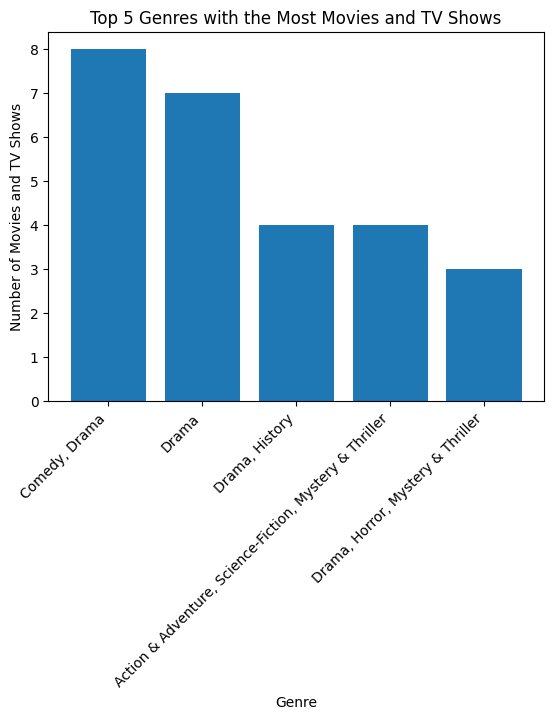

In [92]:
#Let's Visvalize it using word cloud
import matplotlib.pyplot as plt
plt.bar(x =Top_5_genres_visulalize.index,height =Top_5_genres_visulalize.values)
plt.xlabel('Genre')
plt.ylabel('Number of Movies and TV Shows')
plt.title('Top 5 Genres with the Most Movies and TV Shows')
plt.xticks(rotation=45, ha='right')
plt.show()


## **Finding Predominant Streaming Service**

In [93]:
# Write Your Code here
##Counting Streaming Service
Streaming_service_counts = final_data_df['Streaming Provider'].value_counts().sort_values(ascending = False)


In [94]:
Streaming_service_counts

Streaming Provider
Netflix                                                                         29
NA                                                                              25
Amazon Prime Video                                                              25
Apple TV                                                                        14
Hotstar                                                                         14
Apple TV+                                                                        9
Jio Cinema                                                                       8
Sony Liv                                                                         3
Amazon miniTV                                                                    2
Zee5                                                                             2
Alt Balaji                                                                       2
Netflix,Crunchyroll,Crunchyroll Amazon Channel                      

In [95]:
## Streaming sevice name according to their count
Top_streaming_service_name = Streaming_service_counts.head(1).index.str.cat(sep="")

In [96]:
Top_streaming_service_name

'Netflix'

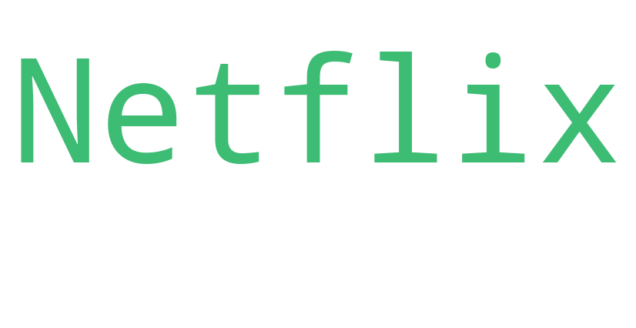

In [97]:
#Let's Visvalize it using word cloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Taking text data from streaming service names
text_data = Top_streaming_service_name

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the generated word cloud using Matplotlib
plt.figure(figsize=(10, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()

## **Task 3 :- Data Export**

In [98]:
#saving final dataframe as Final Data in csv format

final_data_df.to_csv("Final Data.csv")

In [99]:
#saving filter data as Filter Data in csv format
filter_data_df.to_csv("Filter Data.csv")

# **Dataset Drive Link (View Access with Anyone) -**

# ***Congratulations!!! You have completed your Assignment.***